In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('Data/kendaraan_train_clean.csv')
df_train.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,0.634615,1.0,0.0,0.0,0.409000,0.932099,0.301038,0
1,1.0,0.430769,0.750000,0.0,1.0,1.0,0.367431,0.172840,0.512111,0
2,1.0,0.015385,0.884615,1.0,0.0,0.0,0.496727,0.981481,0.377163,0
3,1.0,0.461538,0.673077,0.0,1.0,1.0,0.536338,0.537037,0.636678,0
4,1.0,0.015385,0.673077,1.0,0.0,0.0,0.310270,0.932099,0.557093,0


In [3]:
df_test = pd.read_csv('Data/kendaraan_test_clean.csv')
df_test.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.446154,0.153846,0.0,0.5,1.0,0.082475,0.154321,0.467128,0
1,1.0,0.030769,0.903846,1.0,0.0,0.0,0.068822,0.932099,0.799308,0
2,1.0,0.061538,0.538462,1.0,0.0,0.0,0.200636,0.932099,0.179931,0
3,1.0,0.400000,0.153846,1.0,0.5,0.0,0.062575,0.759259,0.083045,0
4,1.0,0.230769,0.442308,0.0,0.5,1.0,0.045268,0.932099,0.757785,0


Data Train Tertarik Count 
 0    202945
1     27686
Name: Tertarik, dtype: int64
Data Test Tertarik Count 
 0    41778
1     5861
Name: Tertarik, dtype: int64


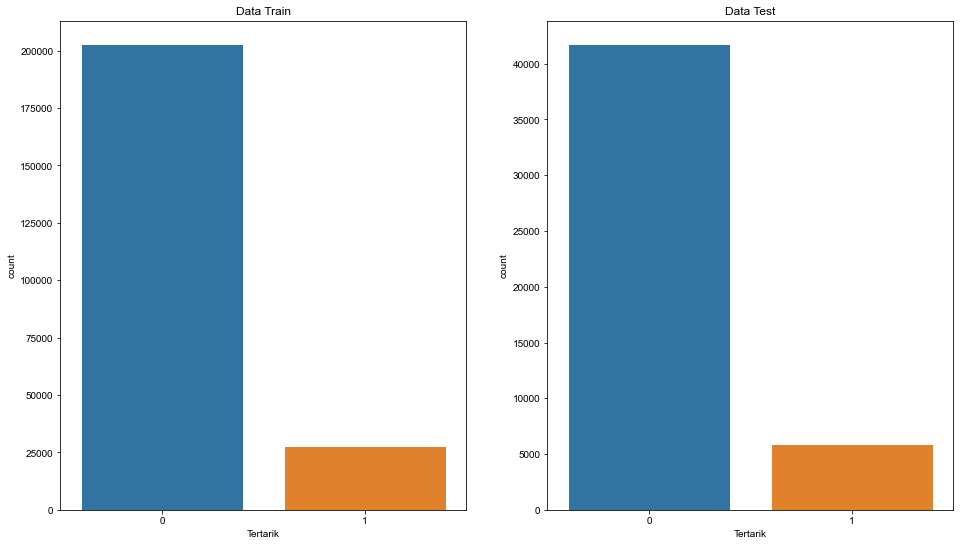

In [4]:
#Pengecekan jumlah dari tertarik dan tidak tertarik
fig, ax =plt.subplots(1,2,figsize=(16,9))
sns.set_theme(style="whitegrid",palette="tab10")
ax[0].set_title("Data Train")
sns.countplot(df_train['Tertarik'], ax=ax[0])
ax[1].set_title("Data Test")
sns.countplot(df_test['Tertarik'], ax=ax[1])
fig.show()
print('Data Train Tertarik Count \n', df_train['Tertarik'].value_counts())
print('Data Test Tertarik Count \n', df_test['Tertarik'].value_counts())

## Train Test Split Data

In [5]:
#Split data train
x_train = df_train.drop('Tertarik',axis=1)
y_train = df_train['Tertarik']
#split data test
x_test = df_test.drop('Tertarik',axis=1)
y_test = df_test['Tertarik']

print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (230631, 9), y_train shape: (230631,)
x_test shape: (47639, 9), y_test shape: (47639,)


## Classification Model

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.linear_model import LogisticRegression

### Mencari K Optimal Akurasi Untuk K-Nearest Neighbors

Maximum accuracy:- 0.8757740506727681 at K = 37


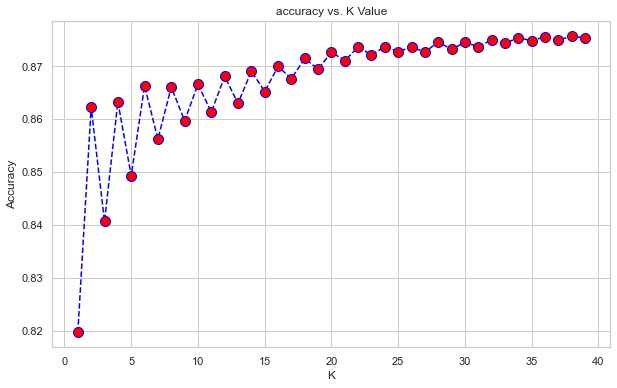

In [7]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
optimumK = acc.index(max(acc))
print("Maximum accuracy:-",max(acc),"at K =",optimumK)

### Pengujian Classification

In [8]:
model_lib = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=optimumK),
    RandomForestClassifier(),
    GaussianNB()
]

model_name = [
    'Decision Tree',
    "Logistic Regression",
    'K-Nearest Neighbors',
    'Random Forest Classifier',
    'Gaussian Naive Bayes'
]

In [9]:
def result_detail(model, model_name):
    model.fit(x_train,y_train)
    predict_result = model.predict(x_test)
    print('='*50)
    # Membuat Confusion matrix untuk melihat bagaimana prediksinya
    matrix = confusion_matrix(y_test,predict_result)
    sns.heatmap(data=matrix,cmap='viridis',annot=True,fmt='.0f',annot_kws={'size':20})

    plt.title(f'Confusion Matrix {model_name}')
    plt.xlabel('Nilai Prediksi')
    plt.ylabel('Nilai Sebenarnya')
    plt.show()

    recal= recall_score(y_test,predict_result) # Melakukan Pencarian Nilai Recal
    precision = precision_score(y_test,predict_result)# Melakukan Pencarian Nilai Precision
    f1Score = f1_score(y_test,predict_result)# Melakukan Pencarian Nilai f1 score
    acc = accuracy_score(y_test,predict_result)# Melakukan Pencarian Akurasi
    print(f'Model {model_name}')
    print(f'Recall\t\t : {recal}')
    print(f'Precision\t : {precision}')
    print(f'F1-Score\t : {f1Score}')
    print(f'Akurasi Score\t : {acc}')
    print('Classification Report: ')
    print(classification_report(y_test,predict_result)) # Library Untuk Memperlihatkan semua info baik akurasi,f1 score, dll
    return model_name, recal, precision, f1Score, acc

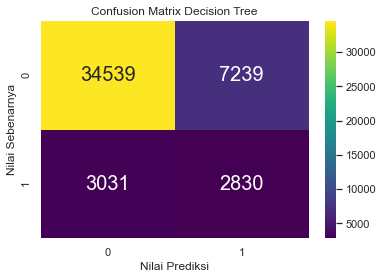

Model Decision Tree
Recall		 : 0.482852755502474
Precision	 : 0.28106068129903666
F1-Score	 : 0.3553044569993723
Akurasi Score	 : 0.7844203278826172
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     41778
           1       0.28      0.48      0.36      5861

    accuracy                           0.78     47639
   macro avg       0.60      0.65      0.61     47639
weighted avg       0.84      0.78      0.81     47639



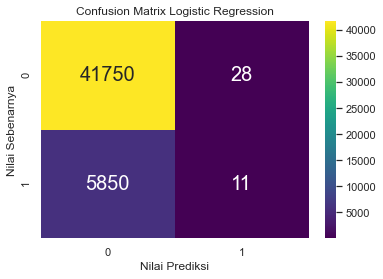

Model Logistic Regression
Recall		 : 0.001876812830574987
Precision	 : 0.28205128205128205
F1-Score	 : 0.0037288135593220332
Akurasi Score	 : 0.8766136988601776
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.28      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.58      0.50      0.47     47639
weighted avg       0.80      0.88      0.82     47639



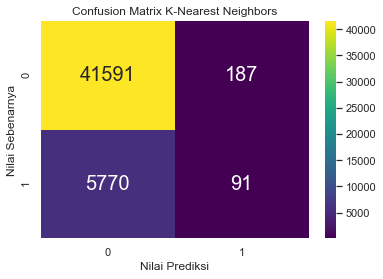

Model K-Nearest Neighbors
Recall		 : 0.015526360689302167
Precision	 : 0.3273381294964029
F1-Score	 : 0.029646522234891674
Akurasi Score	 : 0.8749553936900438
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.33      0.02      0.03      5861

    accuracy                           0.87     47639
   macro avg       0.60      0.51      0.48     47639
weighted avg       0.81      0.87      0.82     47639



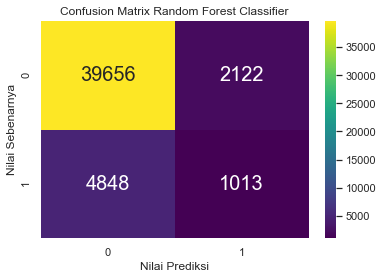

Model Random Forest Classifier
Recall		 : 0.1728373997611329
Precision	 : 0.3231259968102073
F1-Score	 : 0.2252112049799911
Akurasi Score	 : 0.8536913033438989
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     41778
           1       0.32      0.17      0.23      5861

    accuracy                           0.85     47639
   macro avg       0.61      0.56      0.57     47639
weighted avg       0.82      0.85      0.83     47639



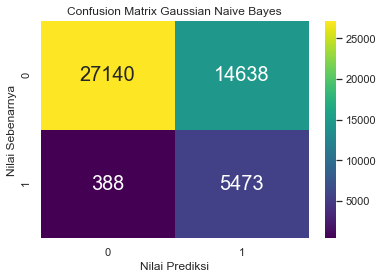

Model Gaussian Naive Bayes
Recall		 : 0.9337996928851732
Precision	 : 0.27213962508080153
F1-Score	 : 0.42145387340212526
Akurasi Score	 : 0.6845861583996306
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.65      0.78     41778
           1       0.27      0.93      0.42      5861

    accuracy                           0.68     47639
   macro avg       0.63      0.79      0.60     47639
weighted avg       0.90      0.68      0.74     47639



In [10]:
model_info = []
for model, i in zip(model_lib,model_name):
    name, recal, precision, f1Score, acc = result_detail(model,i)
    model_info.append([name,recal, precision, f1Score, acc]) # Ini semua info yang nanti akan ditapilkan kedalam dataframe untuk setiap model

In [11]:
# Hasil info sebelumnya dimasukan kedalam data frame
df_result = pd.DataFrame(model_info, columns=['Nama_Model', 'Recall', 'Precision', 'F1_Score','Akurasi'])
df_result

,Nama_Model,Recall,Precision,F1_Score,Akurasi
0,Decision Tree,0.482853,0.281061,0.355304,0.784420
1,Logistic Regression,0.001877,0.282051,0.003729,0.876614
2,K-Nearest Neighbors,0.015526,0.327338,0.029647,0.874955
3,Random Forest Classifier,0.172837,0.323126,0.225211,0.853691
4,Gaussian Naive Bayes,0.933800,0.272140,0.421454,0.684586


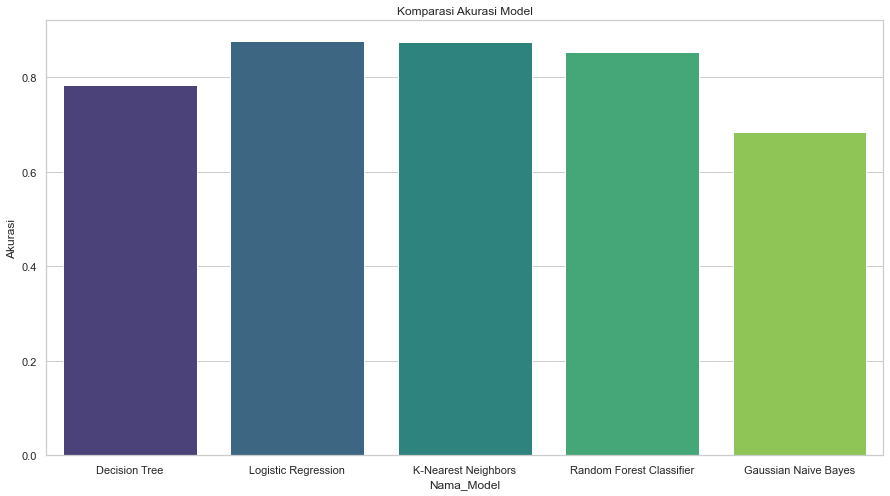

[0.78442033 0.8766137  0.87495539 0.8536913  0.68458616]


In [12]:
# Melihat Akurasi untuk setiap model
plt.figure(figsize=(15,8))
sns.barplot(x='Nama_Model',y='Akurasi',palette='viridis', data=df_result).set_title('Komparasi Akurasi Model')
plt.show()
print(df_result['Akurasi'].values)

## **Eksperimen Data Train Dengan Data Yang Masih Menggunakan Outlier**

In [13]:
#Input Data Eksperimen
df_train_eksperimen = pd.read_csv('Data/kendaraan_train_clean_with_outlier.csv')
df_train_eksperimen

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038,0
1,1.0,0.430769,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111,0
2,1.0,0.015385,0.884615,1.0,0.0,0.0,0.056002,0.981481,0.377163,0
3,0.0,0.584615,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0
4,1.0,0.461538,0.673077,0.0,1.0,1.0,0.059953,0.537037,0.636678,0
...,...,...,...,...,...,...,...,...,...,...
285657,0.0,0.046154,0.076923,1.0,0.0,0.0,0.043454,0.932099,0.716263,0
285658,0.0,0.015385,0.884615,1.0,0.0,0.0,0.078239,0.932099,0.138408,0
285659,0.0,0.046154,0.961538,1.0,0.0,0.0,0.087661,0.932099,0.747405,0
285660,1.0,0.738462,0.134615,1.0,0.5,0.0,0.051853,0.759259,0.899654,0


In [14]:
#split data train dengan data eksperimen
x_train = df_train_eksperimen.drop('Tertarik',axis=1)
y_train = df_train_eksperimen['Tertarik']
#split data test
x_test = df_test.drop('Tertarik',axis=1)
y_test = df_test['Tertarik']

print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (285662, 9), y_train shape: (285662,)
x_test shape: (47639, 9), y_test shape: (47639,)


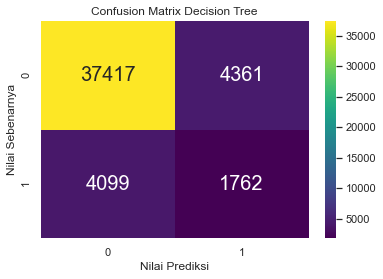

Model Decision Tree
Recall		 : 0.30063129158846613
Precision	 : 0.28776743426424956
F1-Score	 : 0.2940587449933244
Akurasi Score	 : 0.8224144083628959
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     41778
           1       0.29      0.30      0.29      5861

    accuracy                           0.82     47639
   macro avg       0.59      0.60      0.60     47639
weighted avg       0.83      0.82      0.82     47639



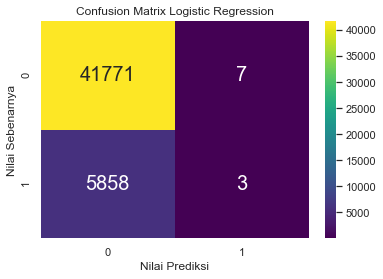

Model Logistic Regression
Recall		 : 0.0005118580447022692
Precision	 : 0.3
F1-Score	 : 0.0010219724067450178
Akurasi Score	 : 0.8768865845210857
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.30      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.59      0.50      0.47     47639
weighted avg       0.81      0.88      0.82     47639



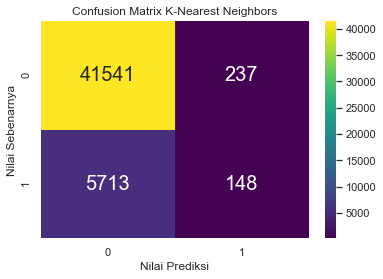

Model K-Nearest Neighbors
Recall		 : 0.025251663538645282
Precision	 : 0.38441558441558443
F1-Score	 : 0.04739032981107909
Akurasi Score	 : 0.8751023321228405
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     41778
           1       0.38      0.03      0.05      5861

    accuracy                           0.88     47639
   macro avg       0.63      0.51      0.49     47639
weighted avg       0.82      0.88      0.82     47639



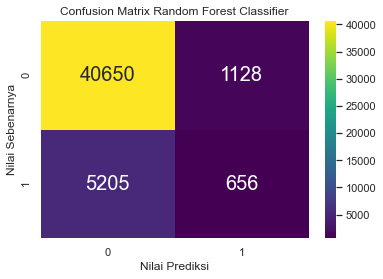

Model Random Forest Classifier
Recall		 : 0.11192629244156288
Precision	 : 0.36771300448430494
F1-Score	 : 0.17161543492478745
Akurasi Score	 : 0.8670627007283948
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     41778
           1       0.37      0.11      0.17      5861

    accuracy                           0.87     47639
   macro avg       0.63      0.54      0.55     47639
weighted avg       0.82      0.87      0.83     47639



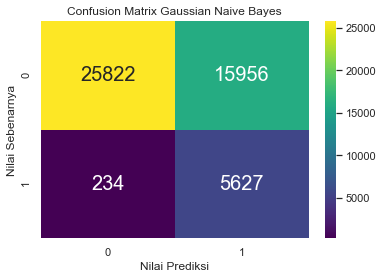

Model Gaussian Naive Bayes
Recall		 : 0.960075072513223
Precision	 : 0.26071445118843534
F1-Score	 : 0.410071418160618
Akurasi Score	 : 0.6601523961460148
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     41778
           1       0.26      0.96      0.41      5861

    accuracy                           0.66     47639
   macro avg       0.63      0.79      0.59     47639
weighted avg       0.90      0.66      0.72     47639



In [15]:
model_info_eksperimen = []
for model, i in zip(model_lib,model_name):
    name, recal, precision, f1Score, acc = result_detail(model,i)
    model_info_eksperimen.append([name,recal, precision, f1Score, acc])# Ini semua info yang nanti akan ditapilkan kedalam dataframe untuk setiap model

In [16]:
# Hasil info sebelumnya dimasukan kedalam data frame
df_result_eksperimen = pd.DataFrame(model_info_eksperimen, columns=['Nama_Model', 'Recall', 'Precision', 'F1_Score','Akurasi'])
df_result_eksperimen

,Nama_Model,Recall,Precision,F1_Score,Akurasi
0,Decision Tree,0.300631,0.287767,0.294059,0.822414
1,Logistic Regression,0.000512,0.300000,0.001022,0.876887
2,K-Nearest Neighbors,0.025252,0.384416,0.047390,0.875102
3,Random Forest Classifier,0.111926,0.367713,0.171615,0.867063
4,Gaussian Naive Bayes,0.960075,0.260714,0.410071,0.660152


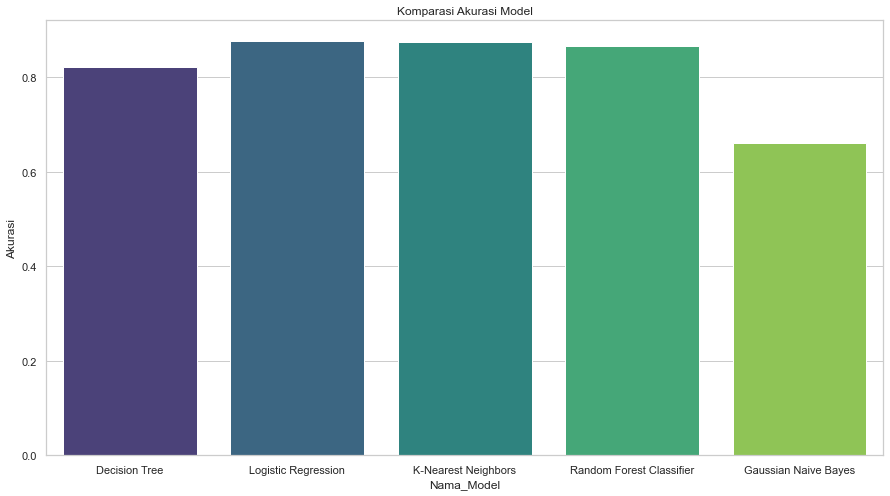

[0.82241441 0.87688658 0.87510233 0.8670627  0.6601524 ]


In [17]:
# Ini semua info yang nanti akan ditapilkan kedalam dataframe untuk setiap model
plt.figure(figsize=(15,8))
sns.barplot(x='Nama_Model',y='Akurasi',palette='viridis', data=df_result_eksperimen).set_title('Komparasi Akurasi Model')
plt.show()
print(df_result_eksperimen['Akurasi'].values)